<a href="https://colab.research.google.com/github/Anu1996rag/Neural_Networks/blob/master/Image_Classifier_using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

#### Loading the dataset


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### Splitting the dataset into train and validation 
##### We will scale the pixel intensities between the range 0-1 by dividing the data points by 255.0 . this will convert them into floats 

In [5]:
X_valid , X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
print(X_train_full.shape)
print(X_train.shape)

(60000, 28, 28)
(55000, 28, 28)


In [7]:
print(y_train_full.shape)
print(y_train.shape)

(60000,)
(55000,)


In [8]:
y_train[0]

4

##### we will specify the class names for classifying the data points to relevant class

In [9]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']
class_names[y_train[0]]

'Coat'

#### Creating a model using Sequential API

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary() #displays all the model layers along with the parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
#to fetch each layer by its index
model.layers

In [12]:
# layer properties
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights,biases = hidden1.get_weights()
print(weights)
print(biases)

[[ 0.02010518  0.06482738 -0.04902246 ...  0.0191288  -0.06550079
   0.06835362]
 [ 0.02718399 -0.00820161 -0.00799919 ... -0.06275571 -0.06979562
   0.04403676]
 [-0.0474141  -0.07296506 -0.06235306 ...  0.01530217  0.06926456
  -0.05787607]
 ...
 [-0.00723439 -0.03009103 -0.06753186 ... -0.04307625  0.02563501
   0.01863525]
 [ 0.05300662  0.03868092  0.04808281 ...  0.02908003  0.00830082
   0.04372817]
 [ 0.0343451   0.04272948  0.05837031 ...  0.07433312  0.01413338
  -0.05492786]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

#### Compiling the model

In [24]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training and Evaluating the model

In [25]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4067 - accuracy: 0.8582 - val_loss: 0.4066 - val_accuracy: 0.8634
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3813 - accuracy: 0.8663 - val_loss: 0.3760 - val_accuracy: 0.8706
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3681 - accuracy: 0.8714 - val_loss: 0.3783 - val_accuracy: 0.8692
Epoch 4/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3553 - accuracy: 0.8747 - val_loss: 0.3727 - val_accuracy: 0.8722
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8791 - val_loss: 0.3427 - val_accuracy: 0.8778
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3354 - accuracy: 0.8813 - val_loss: 0.3521 - val_accuracy: 0.8766
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3259 - accuracy: 0.8834 - val_loss: 0.3477 - val_accuracy:

#### Plotting the learning curves


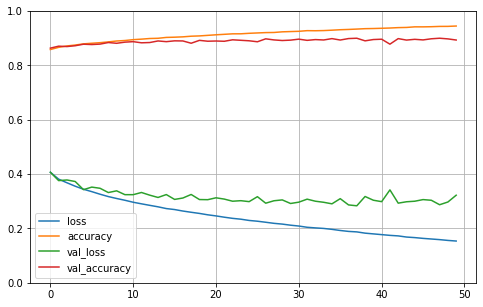

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluating the model

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 93.7868 - accuracy: 0.8230


[93.7867660522461, 0.8230000138282776]

#### Make Predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
pred = model.predict_classes(X_new)
pred

array([9, 2, 1])

In [30]:
import numpy as np
np.array(class_names)[pred]

array(['Ankel Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

The Predicted and the data points in the test data are almost the same.